In [1]:
import pandas as pd

In [6]:
# load data that preprocessed
data = pd.read_csv("Preprocessed_Dataset/data.csv")

In [7]:
data.columns

Index(['ระดับรายได้', 'target', 'ปัจจัยสถาบันการศึกษา(avg)',
       'ปัจจัยด้านโปรแกรมการศึกษา/หลักสูตร(avg)', 'ปัจจัยในการตัดสินใจ(avg)',
       'ปัจจัยด้านเหตุผลส่วนตัว(avg)',
       'ปัจจัยด้านสื่อและการประชาสัมพันธ์(avg)'],
      dtype='object')

In [8]:
# change columns name for easy to use
data.columns = ["salary levels", "preparedness", "avgQ1", "avgQ2", "avgQ3", "avgQ4", "avgQ5"]

In [9]:
data.columns

Index(['salary levels', 'preparedness', 'avgQ1', 'avgQ2', 'avgQ3', 'avgQ4',
       'avgQ5'],
      dtype='object')

-------------------------------------------------------------------------------------------------------------

# EDA (Exploratory Data Analysis)

*explore data*

In [11]:
# show some observation
data.head()

,salary levels,preparedness,avgQ1,avgQ2,avgQ3,avgQ4,avgQ5
0,1,1,3.833333,4.333333,3.75,2.8,4.0
1,2,1,3.833333,3.833333,2.75,3.4,2.8
2,1,1,4.500000,4.666667,4.00,4.2,5.0
3,3,0,4.833333,4.500000,3.75,3.6,3.8
4,2,1,2.666667,4.500000,1.75,2.0,3.0


In [12]:
# show information of our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   salary levels  486 non-null    int64  
 1   preparedness   486 non-null    int64  
 2   avgQ1          486 non-null    float64
 3   avgQ2          486 non-null    float64
 4   avgQ3          486 non-null    float64
 5   avgQ4          486 non-null    float64
 6   avgQ5          486 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 26.7 KB


* basic statistic of target variable: calculate average of target variable
and explore ratio values for ให้เข้าใจการกระจายของ target

In [20]:
print(f"average of target variable values: {data['preparedness'].mean()}")

average of target variable values: 0.2962962962962963


In [14]:
data["preparedness"].value_counts()

preparedness
0    342
1    144
Name: count, dtype: int64

this is imbalance data(label)

-------------------------------------------------------------------------------------------------------------

* basic statistic of features: calculate average, median and standard deviation of features เพื่อเข้าใจคุณสมบัติของข้อมูล

In [22]:
features = ["salary levels", "avgQ1", "avgQ2", "avgQ3", "avgQ4", "avgQ5"]

In [26]:
print(f"Average values of features: \n{data[features].mean()}")

Average values of features: 
salary levels    1.905350
avgQ1            3.809671
avgQ2            3.972565
avgQ3            3.459877
avgQ4            3.090947
avgQ5            3.626749
dtype: float64


In [27]:
print(f"Median values of features: \n{data[features].median()}")

Median values of features: 
salary levels    2.000000
avgQ1            3.833333
avgQ2            4.000000
avgQ3            3.500000
avgQ4            3.200000
avgQ5            3.800000
dtype: float64


In [28]:
print(f"Standard deviation values of features: \n{data[features].std()}")

Standard deviation values of features: 
salary levels    0.932402
avgQ1            0.580970
avgQ2            0.560275
avgQ3            0.771219
avgQ4            0.892697
avgQ5            0.776262
dtype: float64


-------------------------------------------------------------------------------------------------------------

* การสร้างฮิสโตแกรมและแผนภาพกลุ่ม: สร้างฮิสโตแกรมเพื่อดูการกระจายของข้อมูลที่มีค่า continuous แยกตามค่าของ target variable หรือสร้างแผนภาพกลุ่ม (box plot) เพื่อดูการกระจายของข้อมูลในแต่ละกลุ่มของ target variable

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

* crate histogram แยกตาม target variable 'preparedness'

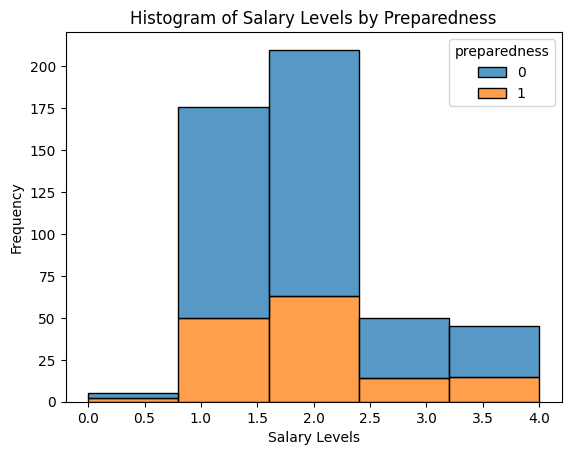

In [31]:
# crate histogram แยกตาม target variable 'preparedness'
sns.histplot(data=data, x='salary levels', hue='preparedness', multiple='stack', bins=5)
plt.title('Histogram of Salary Levels by Preparedness')
plt.xlabel('Salary Levels')
plt.ylabel('Frequency')
plt.show()

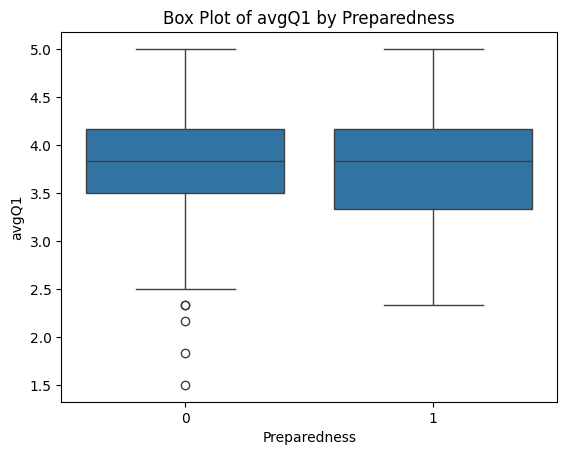

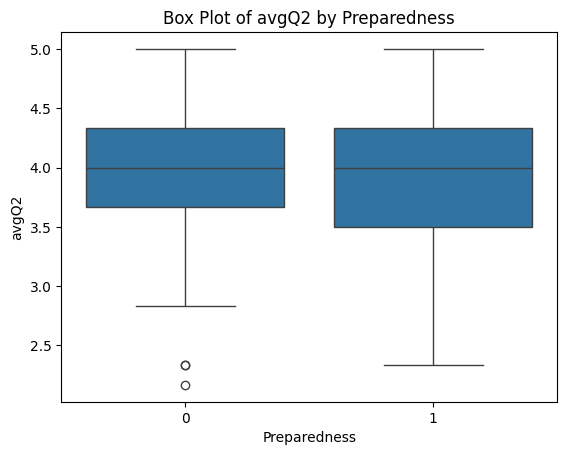

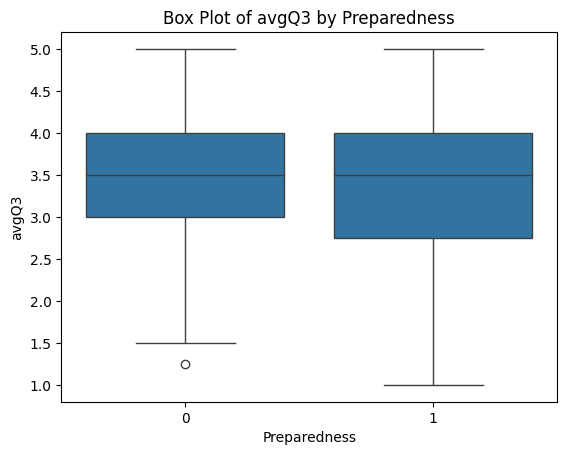

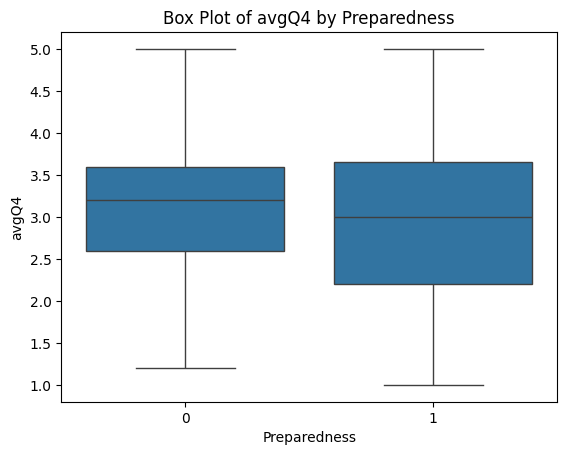

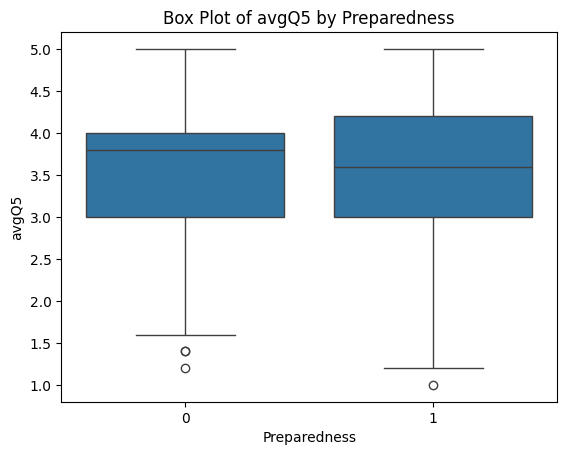

In [34]:
Q_columns = ['avgQ1', 'avgQ2', 'avgQ3', 'avgQ4', 'avgQ5']
# create แผนภาพกลุ่ม (box plot)
for column in Q_columns:
    plt.figure()
    sns.boxplot(data=data, x='preparedness', y=column)
    plt.title(f'Box Plot of {column} by Preparedness')
    plt.xlabel('Preparedness')
    plt.ylabel(column)
    plt.show()

-------------------------------------------------------------------------------------------------------------

* การสร้างแผนภาพเพื่อสำรวจความสัมพันธ์: สร้าง scatter plot เพื่อวิเคราะห์ความสัมพันธ์ระหว่าง features และ target variable เพื่อหาความสัมพันธ์ที่เป็นไปได้

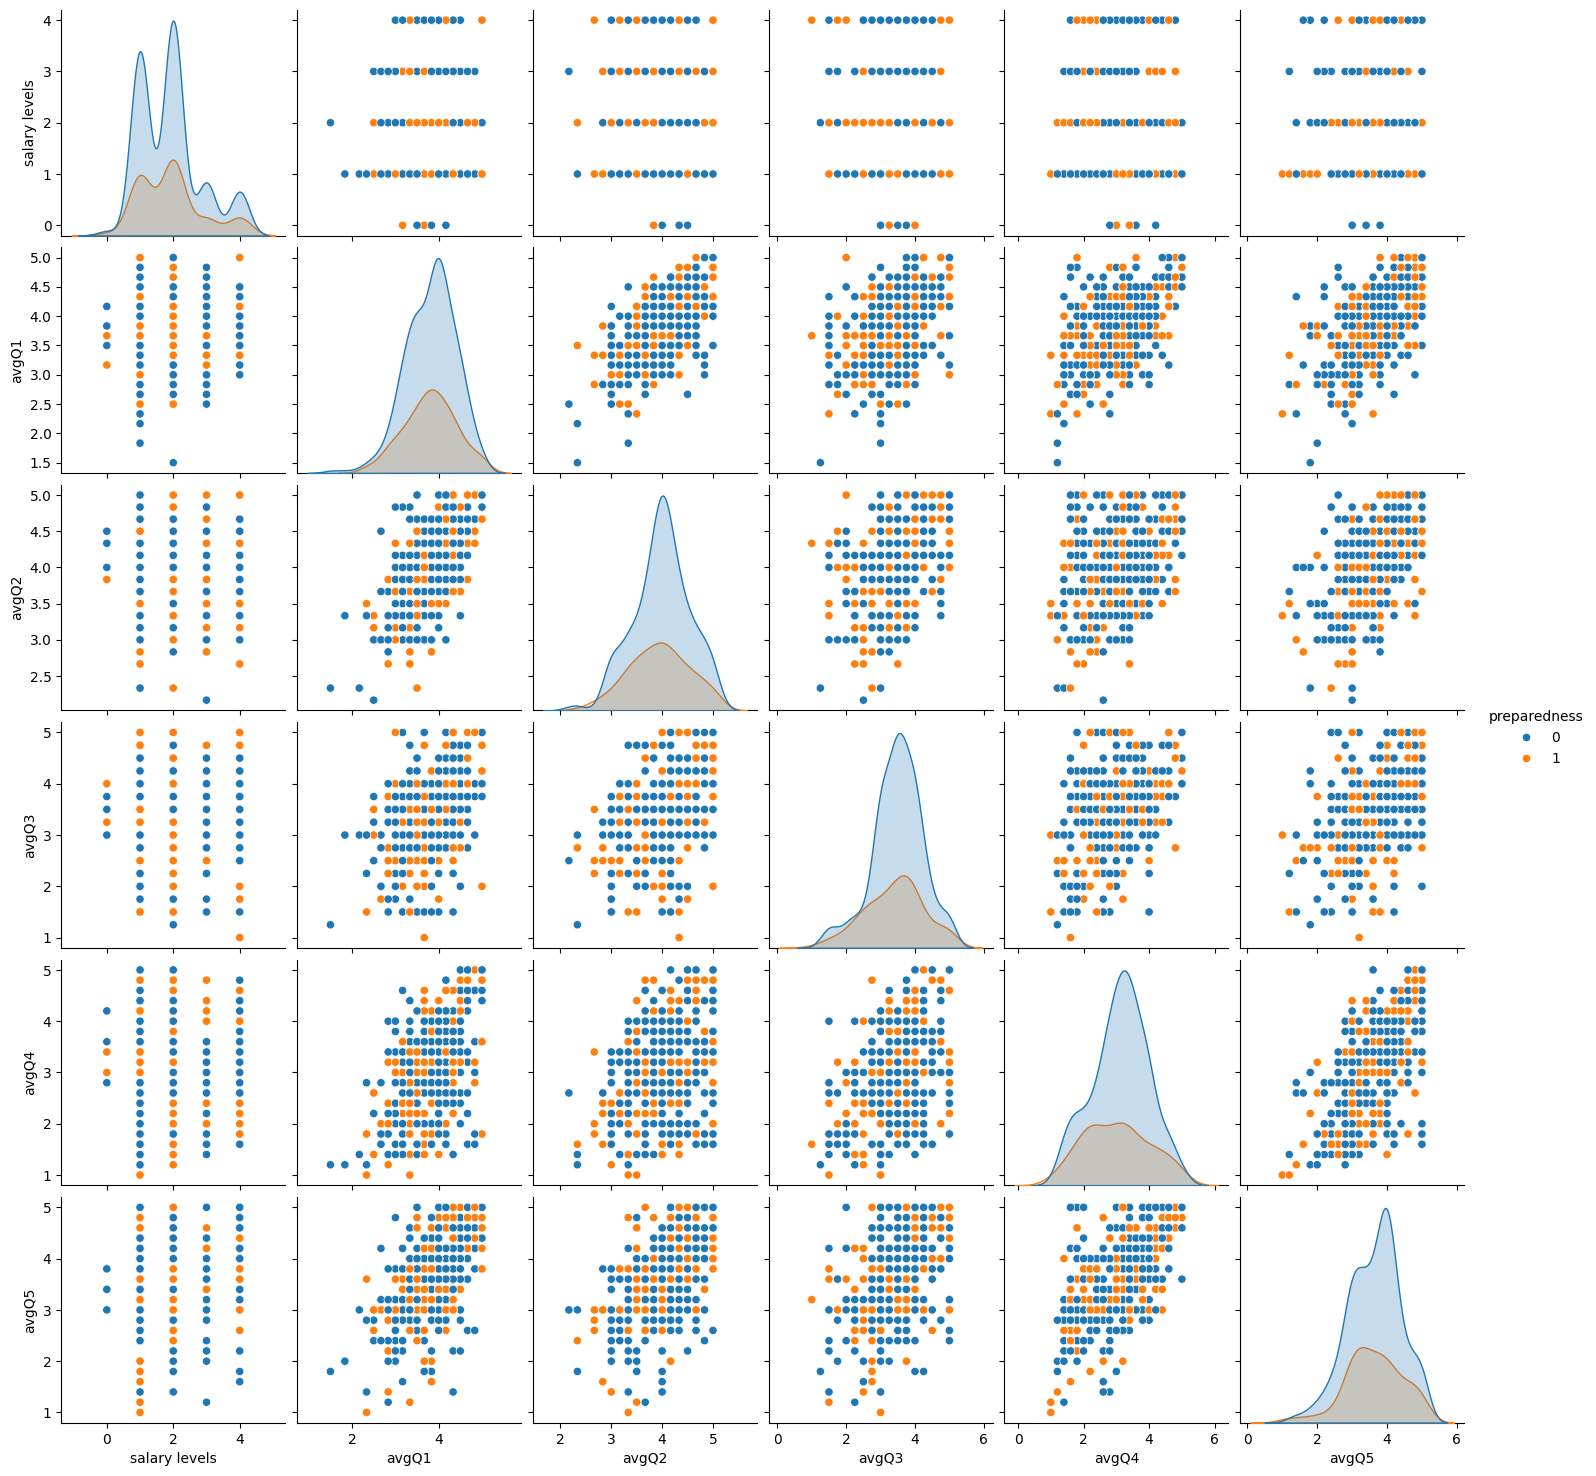

In [35]:
sns.pairplot(data, hue='preparedness')
plt.show()

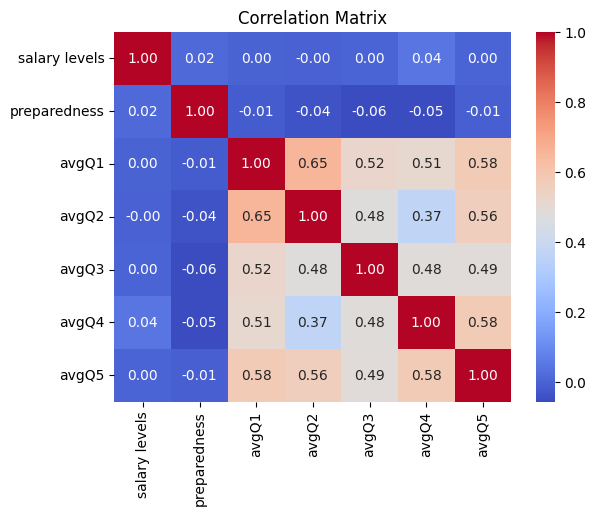

In [37]:
# คำนวณ correlation matrix
correlation_matrix = data.corr()

# พล็อต correlation matrix โดยใช้ seaborn
plt.figure()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

ดูเหมือนว่า การหา correlation ไม่ค่อย usefull เท่าไหร่ เพราะ target variable เป็น binary values (0, 1)

-------------------------------------------------------------------------------------------------------------

In [39]:
data[features].max()

salary levels    4.0
avgQ1            5.0
avgQ2            5.0
avgQ3            5.0
avgQ4            5.0
avgQ5            5.0
dtype: float64

เนื่องจาก features avgQ1-Q5 นั้นมี values range ที่เหมือนกัน(1-5), แต่ features salary levels นั้น อยู่คนละ values range คือ (0-4).
ดังนั้นเราจึงต้อง:

* Standardize data ก่อน เพื่อ ensure ว่า they are on a similar scale
(they will have a mean of 0 and a standard deviation of 1)

In [40]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [42]:
# ใช้ StandardScaler สำหรับ standardization
scaler_standard = StandardScaler()
df_standardized = data[features].copy()
df_standardized[features] = scaler_standard.fit_transform(df_standardized[features])

In [43]:
# แสดง DataFrame หลังจาก standardization
print("Data after Standardization:")
df_standardized.head()

Data after Standardization:


,salary levels,avgQ1,avgQ2,avgQ3,avgQ4,avgQ5
0,-0.971987,0.040771,0.644576,0.376576,-0.326254,0.481327
1,0.101617,0.040771,-0.248762,-0.921409,0.346559,-1.066137
2,-0.971987,1.189460,1.240136,0.701072,1.243643,1.770880
3,1.175221,1.763805,0.942356,0.376576,0.570830,0.223416
4,0.101617,-1.969434,0.942356,-2.219394,-1.223339,-0.808226


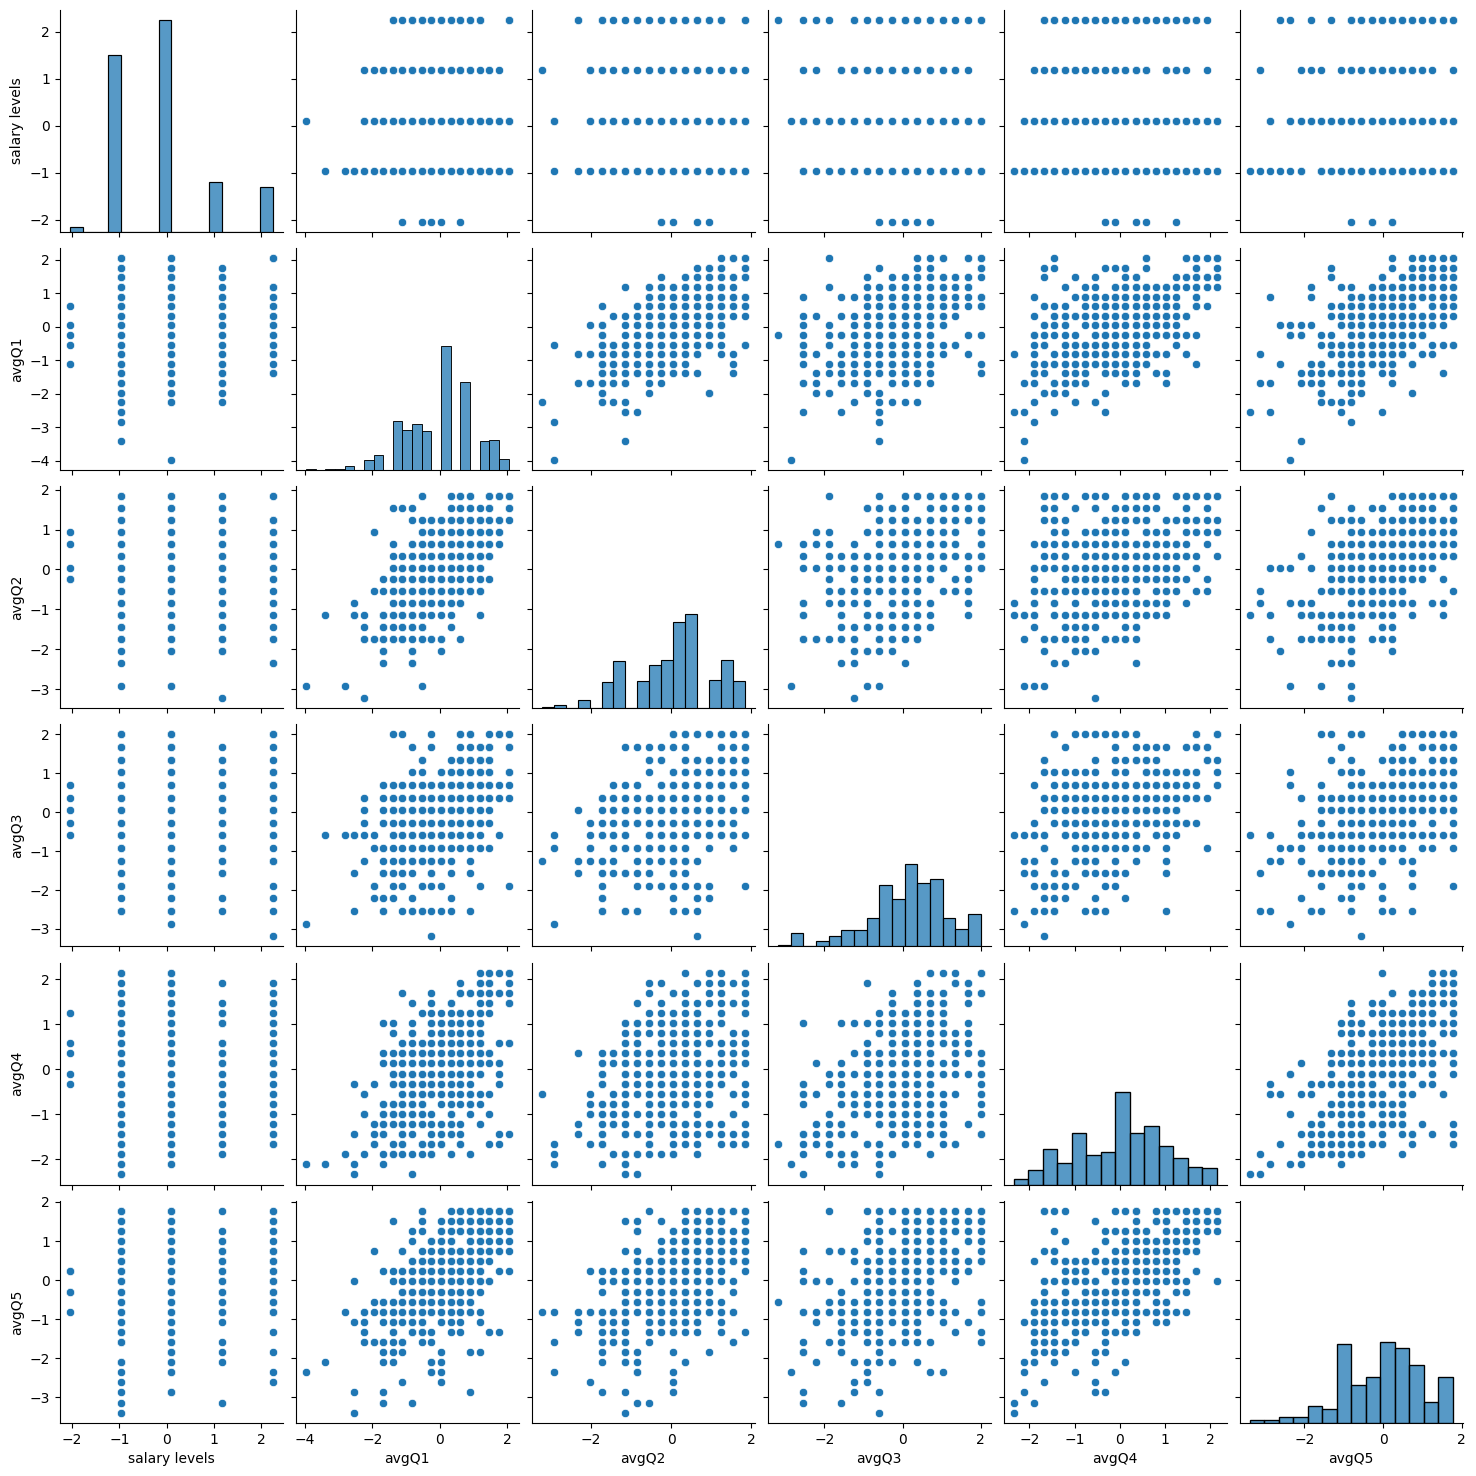

In [48]:
sns.pairplot(df_standardized)
plt.show()

-------------------------------------------------------------------------------------------------------------

* การสร้างแบบจำลองเบื้องต้น: หากต้องการ, คุณสามารถสร้างแบบจำลองทดลองเบื้องต้นเพื่อทดสอบความสัมพันธ์ระหว่าง features และ target variable โดยใช้เทคนิคง่ายๆ เช่น logistic regression, Randomforest, KNN, Neural Network(simple)

เนื่องจาก Data นั่น imbalance จึงจะใช้การ over-samplings เพื่อเพิ่มจำนวนข้อมูลที่มีน้อยให้มีมากขึ้น

In [50]:
from imblearn.over_sampling import SMOTE

In [100]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [53]:
# prepare
X = df_standardized
y = data["preparedness"]

In [54]:
# Over-sampling ด้วย SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [101]:
# สร้างแบบจำลอง (ใช้ Logistic Regression, Random Forest, knn)
lr = LogisticRegression(max_iter=1000)  # เพื่อให้ convergence
rfc = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=5)


In [102]:
# ใช้ 5-fold cross-validation
lr_cv_scores = cross_val_score(lr, X_resampled, y_resampled, cv=5)
rfc_cv_scores = cross_val_score(rfc, X_resampled, y_resampled, cv=5)
knn_cv_scores = cross_val_score(knn, X_resampled, y_resampled, cv=5)

In [103]:
# 5. แสดงผลลัพธ์
print("lr Cross-Validation Scores:", lr_cv_scores)
print("rfc Cross-Validation Scores:", rfc_cv_scores)
print("knn Cross-Validation Scores:", knn_cv_scores)

lr Cross-Validation Scores: [0.51094891 0.49635036 0.52554745 0.54014599 0.53676471]
rfc Cross-Validation Scores: [0.67153285 0.67883212 0.82481752 0.88321168 0.82352941]
knn Cross-Validation Scores: [0.58394161 0.60583942 0.62773723 0.67883212 0.67647059]


NN

In [105]:
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [249]:
input_shape = X_resampled.shape[1]

# Define NN
def create_NN():
    model = Sequential([
        Dense(6, activation='relu', input_shape=(input_shape,)),
        Dense(300, activation='relu'),
        Dense(135, activation='relu'),
        Dense(25, activation='relu'),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer='adam', 
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [250]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
nn_cv_scores = []

In [251]:
for train_idx, val_idx in k_fold.split(X_resampled):
    X_train_fold, X_val_fold = X_resampled.iloc[train_idx], X_resampled.iloc[val_idx]
    y_train_fold, y_val_fold = y_resampled.iloc[train_idx], y_resampled.iloc[val_idx]
    
    # train the model
    NN = create_NN()
    NN.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, verbose=0)
    
    # evaluate on validation set
    _, accuracy = NN.evaluate(X_val_fold, y_val_fold, verbose=0)
    nn_cv_scores.append(accuracy)

c:\Users\tarza\OneDrive\Desktop\Thesis\.venv\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


c:\Users\tarza\OneDrive\Desktop\Thesis\.venv\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\tarza\OneDrive\Desktop\Thesis\.venv\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\tarza\OneDrive\Desktop\Thesis\.venv\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().

In [252]:
print("NN Cross-Validation Scores:", nn_cv_scores)

NN Cross-Validation Scores: [0.6058394312858582, 0.6423357725143433, 0.6277372241020203, 0.7299270033836365, 0.6323529481887817]


-------------------------------------------------------------------------------------------------------------

# Model comparing

In [258]:
# สร้าง DataFrame สำหรับเก็บคะแนน cross-validation ของทั้งสองโมเดล
models_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'KNeighborsClassifier', 'Neural Networks'],
    'Mean CV Score': [lr_cv_scores.mean(), rfc_cv_scores.mean(), knn_cv_scores.mean(), np.mean(nn_cv_scores)] # นำค่าเฉลี่ยของ cross-validation scores มาใส่
})

In [259]:
models_comparison

,Model,Mean CV Score
0,Logistic Regression,0.521951
1,Random Forest,0.776385
2,KNeighborsClassifier,0.634564
3,Neural Networks,0.647638


โดย model comparing นี้อิงจาก metrices แค่ accuracy เท่านั้น (โดยจะมีการ evaluate โดยใช้ metrices อื่นๆอีกในการแก้ไขในอนาคตครับ)